In [28]:
import numpy as np
import scipy.linalg as la
import math as math
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv

import numpy as np
from scipy.integrate import simpson
from numpy import trapz

In [34]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-DOS_+k.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
df_dos = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
df_dos = df_dos.astype(float)
display(df_dos)

,#,EFERMI(eV)
0,7.880,1.089530e-08
1,7.885,1.746210e-07
2,7.890,1.766560e-06
3,7.895,1.153790e-05
4,7.900,5.034630e-05
5,7.905,1.539430e-04
6,7.910,3.494540e-04
7,7.915,6.246540e-04
8,7.920,9.287690e-04
9,7.925,1.211630e-03


In [35]:
dos_k = df_dos["EFERMI(eV)"]
energies_k = df_dos["#"]

In [ ]:
combined = pd.concat([df_dos, df_dos_high], ignore_index=True)
combined.drop([11],axis = 0, inplace= True, )
energies_combined = combined["#"]
dos_combined = combined["EFERMI(eV)"]
display(combined)

### DOS for -k (+P polarization)

In [27]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-DOS-k.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
df_dos_minus = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
df_dos_minus = df_dos_minus.astype(float)
display(df_dos_minus)

,#,EFERMI(eV)
0,7.880,6.823280e-08
1,7.885,8.110950e-07
2,7.890,6.171890e-06
3,7.895,3.097510e-05
4,7.900,1.070200e-04
5,7.905,2.688100e-04
6,7.910,5.205630e-04
7,7.915,8.218250e-04
8,7.920,1.116450e-03
9,7.925,1.374960e-03


In [31]:
energies_minus = df_dos_minus["#"]
dos_minus = df_dos_minus["EFERMI(eV)"]

In [60]:
def obtained_doped_e_dens(dos, energies):
    conv_factor = 10**24
    doped_electron_density = [simpson(dos[:-x], energies[:-x])*conv_factor for x in range(1, len(energies))]
    doped_electron_density = doped_electron_density[::-1]
    return doped_electron_density

In [63]:
def plot_combined_dos(title, energies, dos):

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20

    plt.ylabel(r"DOS [eV$^{-1}$$ \AA^{-3}$]", fontsize = fontSize)
    plt.xlabel(r'Energy [eV]',fontsize = fontSize)


    plt.tick_params(axis='both', which='major', labelsize=ticksize)

    plt.plot(energies, dos, linestyle = '-', marker = '.', color = 'black', label = '+P')
    plt.plot(energies_k, dos_k,  linestyle = '-', marker = '.', color = 'blue', label = '-P')

    # Conversion factor from 1/A^3 to 1/cm^3
    # conv_factor = 10**24

    # doped_electron_density = [simpson(dos[:-x], energies[:-x])*conv_factor for x in range(1, len(energies)-1)]
    # doped_electron_density = doped_electron_density[::-1]

    doped_e_density_plus = obtained_doped_e_dens(dos, energies)
    doped_e_density_minus = obtained_doped_e_dens(dos_k, energies_k)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(r'Doped el-density [cm$^{-3}]$', color=color, fontsize = fontSize )  # we already handled the x-label with ax1

    ax2.plot(energies[1:], doped_e_density_plus, color = color , marker = '.', linestyle = '-.')
    ax2.plot(energies_k[1:], doped_e_density_minus, color = 'black' , marker = '.', linestyle = '-.')

    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax.legend(fontsize=ticksize)
    plt.savefig("DOS_{}.pdf".format(title))

    # plt.xlim(7.88,7.8986)

    plt.show()
    # return doped_electron_density

    

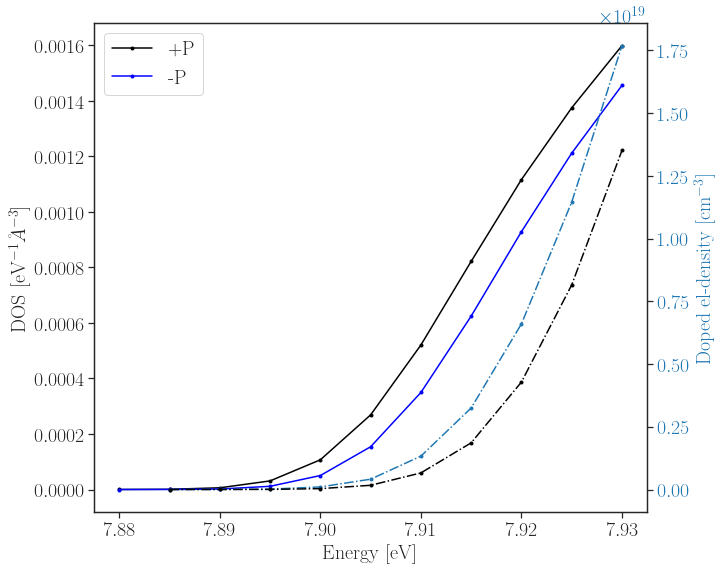

In [64]:
plot_combined_dos("-k_struc", energies_minus, dos_minus)

### Doped e-density and DOS in refined mesh

In [67]:
def import_dos_data(filename):
    datContent = [i.strip().split() for i in open("./{}".format(filename)).readlines()]
    values = datContent[1:]
    columns = datContent[0]
    df = pd.DataFrame(columns = columns)
    dos_df = df.append(pd.DataFrame(values, columns=columns), ignore_index=True)
    dos_df = dos_df.astype(float)
    return dos_df

In [70]:
dos_rf_neg = import_dos_data(filename = "pto-gyrotropic-DOS_refined_neg.dat")
dos_rf_pos = import_dos_data(filename = "pto-gyrotropic-DOS_refined_plus.dat")

energies_minus = dos_rf_neg["#"]
dos_minus = dos_rf_neg["EFERMI(eV)"]

energies_plus = dos_rf_pos["#"]
dos_plus = dos_rf_pos["EFERMI(eV)"]

In [108]:
def plot_dos_one(title, energies, dos, vline_pos):
    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (8,8 )})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20
    plt.ylabel(r"DOS [eV$^{-1}$$ \AA^{-3}$]", fontsize = fontSize)
    plt.xlabel(r'Energy [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')
    plt.tick_params(axis='both', which='major', labelsize=ticksize)

    plt.plot(energies, dos, linestyle = '-', marker = '.', color = 'black')

    # ax.ticklabel_format(axis='y', style='sci')

    # print(energies_combined, dos_combined)

    # Conversion factor from 1/A^3 to 1/cm^3
    conv_factor = 10**24
    doped_electron_density = [simpson(dos[:-x], energies[:-x])*conv_factor for x in range(1, len(energies))]
    doped_electron_density = doped_electron_density[::-1]
    print(energies, doped_electron_density)

    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(r'Doped el-density [cm$^{-3}]$', color=color, fontsize = fontSize )  # we already handled the x-label with ax1
    ax2.plot(energies[1:], doped_electron_density, color = color , marker = '.', linestyle = '-.')
    # ax2.plot(energies_high[1:-1], doped_electron_density_high, color = color, marker = '.', linestyle = '-.')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 
    # x_zero = [x*0 for x in range(energies)]
    
    plt.axhline(0, linestyle = '--', color = 'gray')
    plt.axvline(vline_pos, linestyle = '--', color = 'gray')
    # plt.xlim(7.885, 7.900)
    # plt.ylim(-0.001, 0.002)

    ax.legend()
    plt.savefig("DOS_{}.pdf".format(title))

    # plt.xlim(7.88,7.8986)


    plt.show()
    return doped_electron_density


No handles with labels found to put in legend.


0     7.885
1     7.886
2     7.887
3     7.888
4     7.889
5     7.890
6     7.891
7     7.892
8     7.893
9     7.894
10    7.895
11    7.896
12    7.897
13    7.898
14    7.899
15    7.900
16    7.901
17    7.902
18    7.903
19    7.904
20    7.905
21    7.906
22    7.907
23    7.908
24    7.909
25    7.910
26    7.911
27    7.912
28    7.913
29    7.914
30    7.915
31    7.916
32    7.917
33    7.918
34    7.919
35    7.920
Name: #, dtype: float64 [0.0, 1035732500000345.9, 2592254999999385.0, 4990725416666957.0, 8501698333334691.0, 1.3697686249998466e+16, 2.108323833333465e+16, 3.161971041667131e+16, 4.615363166666279e+16, 6.6189687083336664e+16, 9.302409833332016e+16, 1.2884266208333382e+17, 1.7546936500001437e+17, 2.3584799541664826e+17, 3.1234583166667565e+17, 4.086381787500407e+17, 5.275648649999717e+17, 6.733807537500234e+17, 8.492348649999182e+17, 1.0596871704166632e+18, 1.307958198333405e+18, 1.5985521704165816e+18, 1.9344838650000297e+18, 2.3198047537501594e+18, 2.757049198

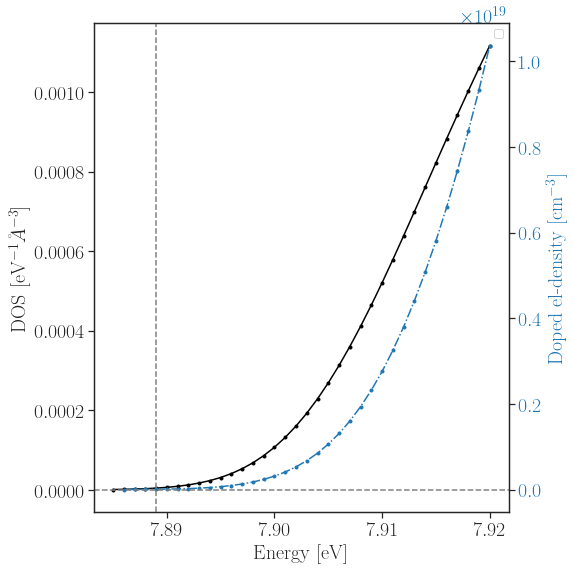

No handles with labels found to put in legend.


0    7.885
1    7.886
2    7.887
3    7.888
4    7.889
5    7.890
6    7.891
7    7.892
8    7.893
Name: #, dtype: float64 [0.0, 231126500000077.16, 596781666666514.9, 1196182833333410.2, 2121220333333690.8, 3573202749999543.5, 5747630333333737.0, 9030315250001432.0]


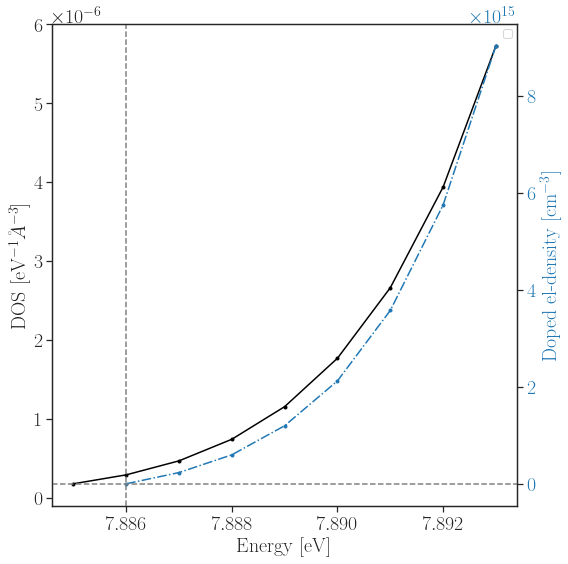

[0.0,
 231126500000077.16,
 596781666666514.9,
 1196182833333410.2,
 2121220333333690.8,
 3573202749999543.5,
 5747630333333737.0,
 9030315250001432.0]

In [112]:
plot_dos_one("+P_structure", energies = energies_minus, dos = dos_minus, vline_pos= 7.889)
plot_dos_one("-P_structure", energies = energies_plus, dos = dos_plus, vline_pos = 7.886)

### Higher energy ranges

In [8]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-DOS_high.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
print(columns)
df_high = pd.DataFrame(columns = columns)
df_dos_high = df_high.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
df_dos_high = df_dos_high.astype(float)
display(df_dos_high)


dos_high = df_dos_high["EFERMI(eV)"]
energies_high = df_dos_high["#"]

['#', 'EFERMI(eV)']


,#,EFERMI(eV)
0,7.930,0.001456
1,7.935,0.001670
2,7.940,0.001869
3,7.945,0.002055
4,7.950,0.002234
5,7.955,0.002414
6,7.960,0.002598
7,7.965,0.002822
8,7.970,0.003079
9,7.975,0.003301


In [ ]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-DOS_higher.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
print(columns)
df_high = pd.DataFrame(columns = columns)
df_dos_high = df_high.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
df_dos_high = df_dos_high.astype(float)
display(df_dos_high)

In [ ]:
def plot_dos(title, energies, dos):
    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20
    plt.ylabel(r"DOS [eV$^{-1}$$ \AA^{-3}$]", fontsize = fontSize)
    plt.xlabel(r'Energy [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')
    plt.tick_params(axis='both', which='major', labelsize=ticksize)

    plt.plot(energies, dos, linestyle = '-', marker = '.', color = 'black')
    plt.plot(energies_high, dos_high, linestyle = '-', marker= '.', color = 'black')

    # ax.ticklabel_format(axis='y', style='sci')



    combined = pd.concat([df_dos, df_dos_high], ignore_index=True)
    combined.drop([11],axis = 0, inplace= True, )
    energies_combined = combined["#"]
    dos_combined = combined["EFERMI(eV)"]
    display(combined)
    # print(energies_combined, dos_combined)

    # Conversion factor from 1/A^3 to 1/cm^3
    conv_factor = 10**24
    doped_electron_density = [simpson(dos_combined[:-x], energies_combined[:-x])*conv_factor for x in range(1, len(energies_combined)-1)]
    doped_electron_density = doped_electron_density[::-1]

    # doped_electron_density = [simpson(dos_high[:-x], energies_high[:-x])*conv_factor for x in range(1, len(energies_high)-1)]
    # doped_electron_density = doped_electron_density[::-1]

    # doped_electron_density = [trapz(dos[:-x], energies[:-x])*conv_factor for x in range(1, len(energies)-1)]
    # doped_electron_density = doped_electron_density[::-1]

    # color = 'tab:red'
    # ax1.set_xlabel('time (s)')
    # ax1.set_ylabel('exp', color=color)
    # ax1.plot(t, data1, color=color)
    # ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(r'Doped el-density [cm$^{-3}]$', color=color, fontsize = fontSize )  # we already handled the x-label with ax1
    ax2.plot(energies_combined[1:-1], doped_electron_density, color = color , marker = '.', linestyle = '-.')
    # ax2.plot(energies_high[1:-1], doped_electron_density_high, color = color, marker = '.', linestyle = '-.')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax.legend()
    plt.savefig("DOS_{}.pdf".format(title))

    # plt.xlim(7.88,7.8986)


    plt.show()
    return doped_electron_density


,#,EFERMI(eV)
0,7.880,1.089530e-08
1,7.885,1.746210e-07
2,7.890,1.766560e-06
3,7.895,1.153790e-05
4,7.900,5.034630e-05
5,7.905,1.539430e-04
6,7.910,3.494540e-04
7,7.915,6.246540e-04
8,7.920,9.287690e-04
9,7.925,1.211630e-03


No handles with labels found to put in legend.


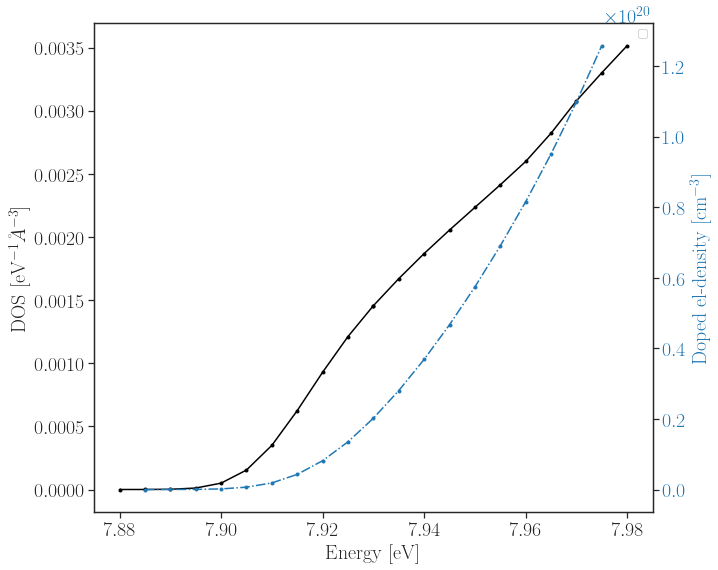

[463790749999990.1,
 4126565499999912.0,
 3.4574720624999268e+16,
 1.679006655000253e+17,
 6.609145706250065e+17,
 1.8605211654999892e+18,
 4.283175695624928e+18,
 8.155252832166521e+18,
 1.3514538612291398e+19,
 2.0207117832166265e+19,
 2.8026718195624423e+19,
 3.688301783216751e+19,
 4.6697301528958935e+19,
 5.742378449883374e+19,
 6.904430152895844e+19,
 8.156848449883323e+19,
 9.510679736229123e+19,
 1.0984568449883262e+20,
 1.2580974319562392e+20]

In [23]:
plot_dos("+k", energies, dos)

In [9]:
# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simpson(y, dx=5)
print("area =", area)

area = 452.5
area = 460.0


## Obtained doped electron density

Essentially yields the concentration of doped electron in the conduction band

In [10]:
import scipy.integrate as integrate
import scipy.special as special


result = integrate.quad()

TypeError: quad() missing 3 required positional arguments: 'func', 'a', and 'b'